In [1]:
import os
import numpy as np
import pandas as pd
import sys
import joblib
sys.path.append('..')
from general_utils.helper import get_config


In [2]:
conf = get_config()
class_names = conf['common_cols']['class_names'].split(',')
data_dir = conf['model_path']['out_model_dir']
cls_names = [class_names[1],class_names[0]]  # label 0: benign, 1: LU
# class_names[1] = benign


# split training

The model was trained using training data, and evaluated using testing data. The training data and testing data was split by all data set.

The processes of model traing and data split were done in ../model_train.py with args "split_train"

In [3]:
# load testing data set
tt_data_fname = os.path.join(data_dir, conf['model_path']['model_split_train_test_data'])
tt_data = np.load(tt_data_fname)
x_test, y_test = tt_data['x_test'], tt_data['y_test']

In [4]:
# load feature selection
sel_feat_fname = os.path.join(data_dir, conf['model_path']['model_split_select_feature_results'])
sel_feats_f = np.load(sel_feat_fname)
raw_feats, sel_supp = sel_feats_f['original_feat'], sel_feats_f['supp']

# new test data after feature selection
x_test_new = x_test[:, sel_supp]

In [5]:
# load model
model_fname = os.path.join(data_dir, conf['model_path']['model_split_model_dump_file'])
clf = joblib.load(model_fname)

In [6]:
p_pred_prob = clf.predict_proba(x_test_new)

In [15]:
p_pred_lab = clf.predict(x_test_new)

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix

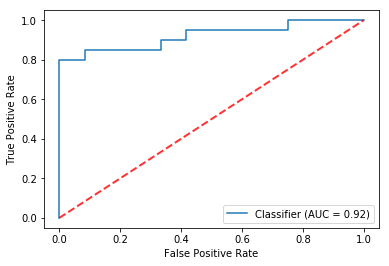

In [8]:
fig, ax = plt.subplots()
clf_disp = plot_roc_curve(clf, x_test_new, y_test, name='Classifier', ax=ax)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=.8)

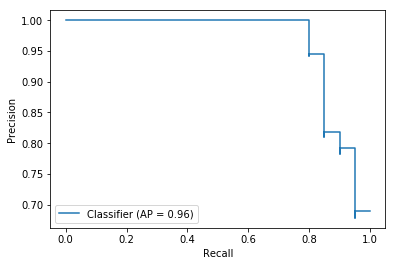

In [9]:
fig, ax = plt.subplots()
disp = plot_precision_recall_curve(clf, x_test_new, y_test, name='Classifier', ax=ax)


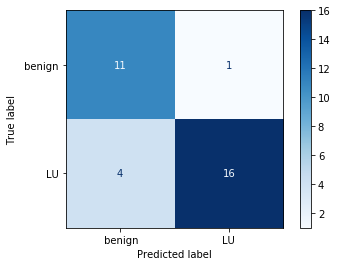

In [10]:

disp = plot_confusion_matrix(clf, x_test_new, y_test,
                                 display_labels=cls_names,
                                 cmap=plt.cm.Blues,
                                 normalize=None)

In [17]:
from pycm import ConfusionMatrix
confusion_matrix1 = ConfusionMatrix(y_test, p_pred_lab)
print(confusion_matrix1)

Predict  0        1        
Actual
0        11       1        

1        4        16       





Overall Statistics : 

95% CI                                                            (0.71794,0.96956)
ACC Macro                                                         0.84375
AUNP                                                              0.85833
AUNU                                                              0.85833
Bennett S                                                         0.6875
CBA                                                               0.76667
Chi-Squared                                                       15.46876
Chi-Squared DF                                                    1
Conditional Entropy                                               0.60639
Cramer V                                                          0.69527
Cross Entropy                                                     0.98025
F1 Macro                                                      